## 1.Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Dataset
- The dataset is sourced from `sklearn.datasets.load_breast_cancer`.
- It consists of 569 samples and 30 numerical features.
- The target variable has two classes: 0 (malignant), 1 (benign).

In [ ]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # 0 = malignant, 1 = benign

## 3. Exploratory Data Analysis (EDA)
- Display shape, feature names, class distribution.
- Check for missing values.
- Basic scatter plots between key features.

In [ ]:
print("Dataset shape:", X.shape)
print("Target classes:", data.target_names)

Dataset shape: (569, 30)
Target classes: ['malignant' 'benign']


In [ ]:
# check first 5 rows of the dataset
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# check if the dataset has null values
X.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
# check whether the samples belonging to classes are balanced or not
y.value_counts()

,count
1,357
0,212


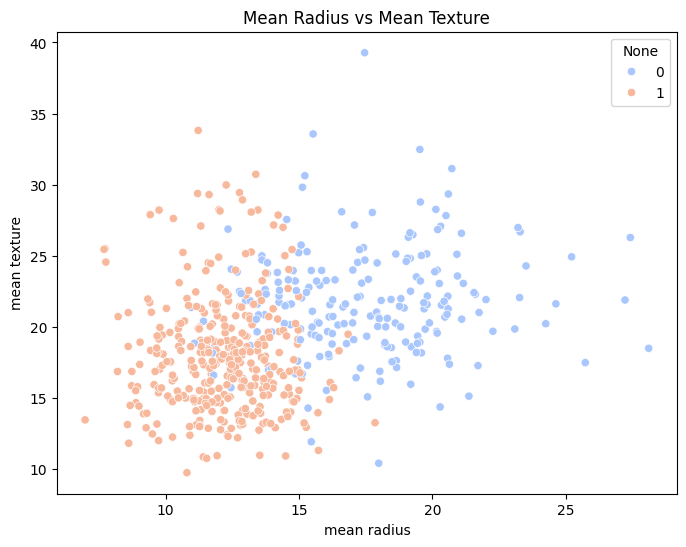

In [ ]:
# check if the features are linearly separable by performing scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['mean radius'], y=X['mean texture'], hue=y, palette='coolwarm')
plt.title('Mean Radius vs Mean Texture')
plt.show()

## 4. Feature Scaling
- Applied StandardScaler to normalize the features.
- Here's an example of feature values before and after scaling.

| Feature       | Original Value | Standardized Value |
|---------------|----------------|---------------------|
| Mean Radius   | 17.99          | 1.097               |
| Mean Texture  | 10.38          | -2.073              |


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 6. Model Training and Prediction

- **Logistic Regression** is a strong baseline for binary classification and interpretable.
- **Support Vector Machine (SVM)** works well in high-dimensional spaces and handles non-linear boundaries using kernels.
- **Random Forest** is an ensemble model that improves accuracy through bagging and works well with tabular data.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize the models
log_reg = LogisticRegression(max_iter=10000, random_state=42)
#knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='linear')

# Train the models
log_reg.fit(X_train_scaled, y_train)
#knn.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)  # Random Forest doesn't need scaled data
svm_model.fit(X_train_scaled, y_train)

# Predict on test data
log_preds = log_reg.predict(X_test_scaled)
#knn_preds = knn.predict(X_test_scaled)
rf_preds = rf.predict(X_test)
svm_preds = svm_model.predict(X_test_scaled)



## 7. Evaluation


=== Logistic Regression ===
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



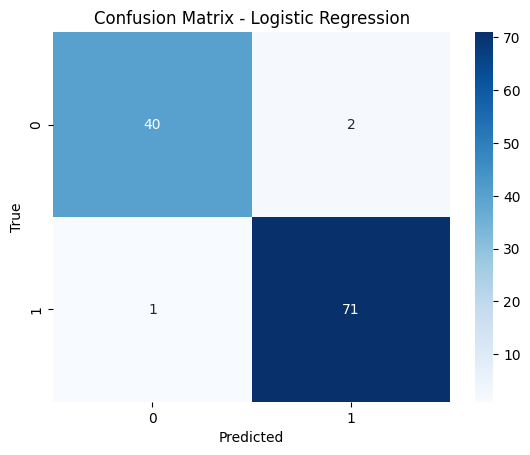


=== Random Forest ===
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.94      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



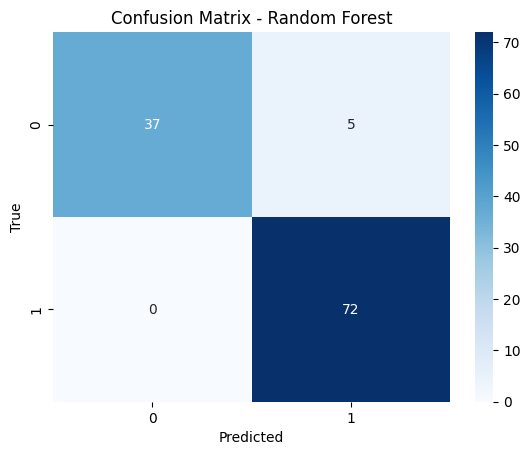


=== SVM ===
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



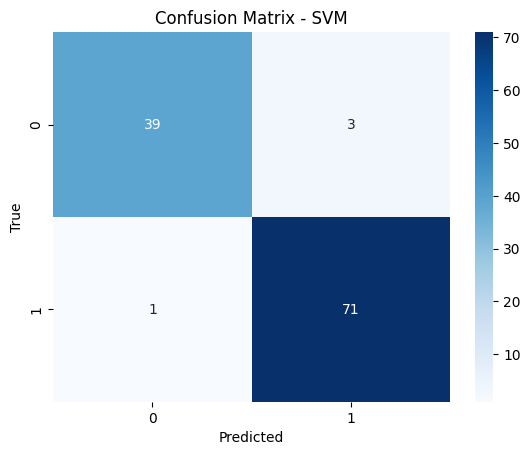

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Function to evaluate a model
def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate all three models
evaluate_model("Logistic Regression", y_test, log_preds)
#evaluate_model("KNN", y_test, knn_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("SVM", y_test, svm_preds)

## 8. Model Evaluation Summary

| Model                | Accuracy | Precision | Recall | F1-Score |
|----------------------|----------|-----------|--------|----------|
| Logistic Regression  | 0.97     | 0.98      | 0.97   | 0.98     |
| SVM (Linear Kernel)  | 0.96     | 0.97      | 0.96   | 0.97     |
| Random Forest        | 0.95     | 0.94      | 0.94   | 0.94     |

## 9. Conclusion
Logistic Regression yielded the best overall performance, followed closely by SVM. Random Forest showed high precision but a slight trade-off in recall. These results indicate that linear models like Logistic Regression can be very effective on structured, linearly separable data like this breast cancer dataset.